# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [9]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [10]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

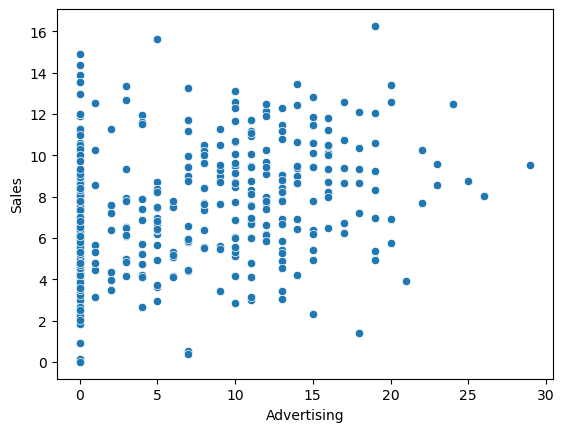

In [11]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

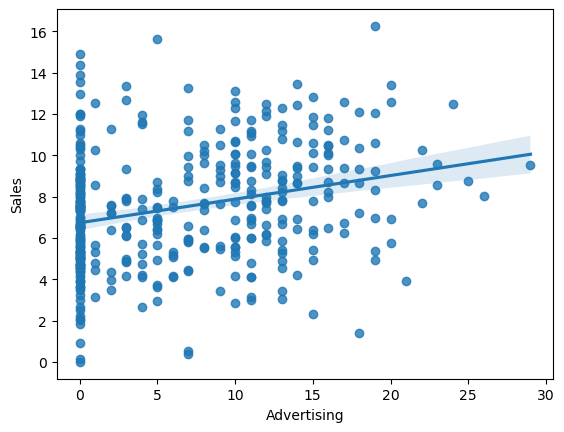

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

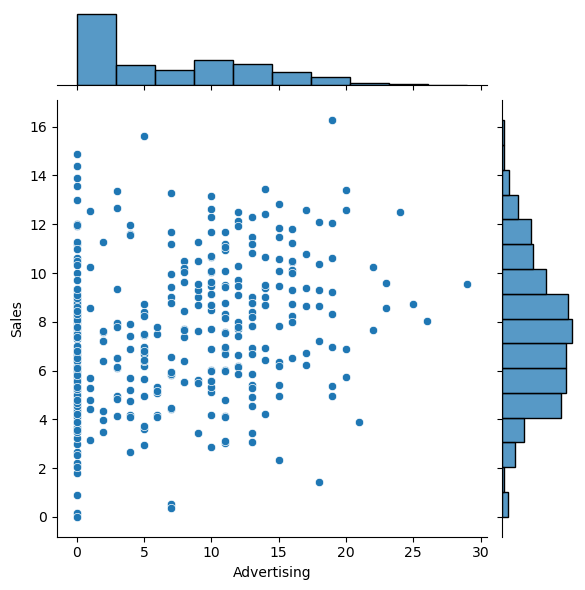

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

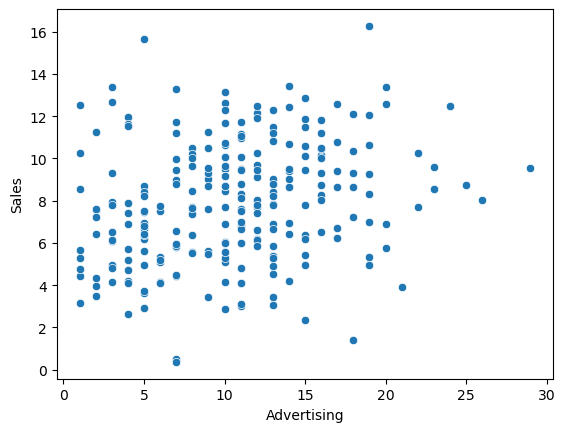

In [8]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [9]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

In [21]:
#### 이변량 분석
def analyze(typ, var, target, data=data):
    ### 숫자형-숫자형 분석
    if typ == 'NN':
        sns.scatterplot(x=var, y = target, data = data)
        plt.show()

        sns.regplot(x=var, y = target, data = data)
        plt.show()

        result = spst.pearsonr(data[var], data[target])
        print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    
    ### 범주형-숫자형 분석
    elif typ == 'CN':
        sns.barplot(x = var, y = target, data=data)
        plt.show()
        
        temp = data.loc[data[var].notnull()]
        cate = data[var].unique()
        arg = []
        for i in cate:
            arg.append(temp.loc[temp[var] == i, target])
            
        ## t-test
        if len(cate) == 2:
            result =spst.ttest_ind(arg[0], arg[1])
            print(f't-통계량 : {result[0]}, p-value : {result[1]}')
        
        ## ANOVA
        else:
            result = spst.f_oneway(*arg)
            print(f'f-통계량 : {result[0]}, p-value : {result[1]}')

1) 시각화 : scatter(regplot), jointplot

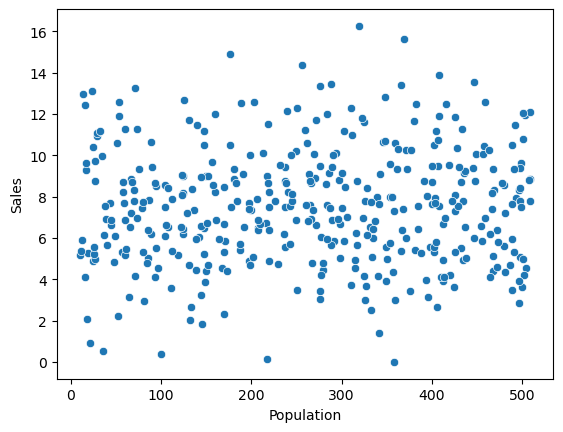

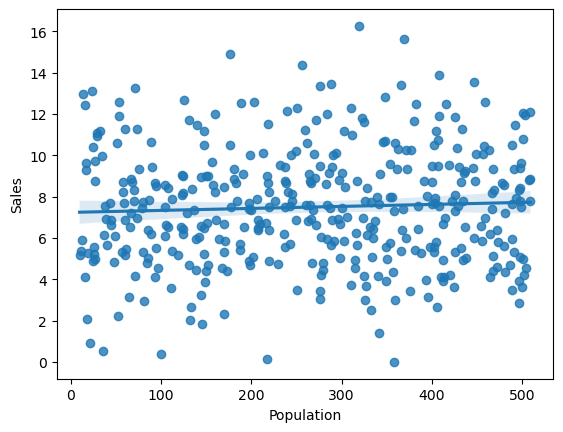

상관계수 : 0.0504709844720392, p-value : 0.3139816093190483


In [15]:
analyze('NN', 'Population', 'Sales')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

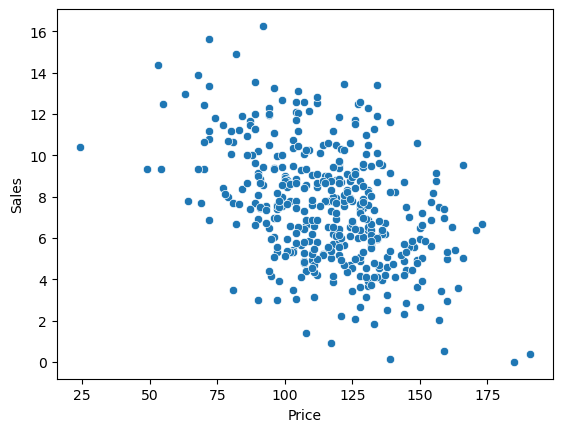

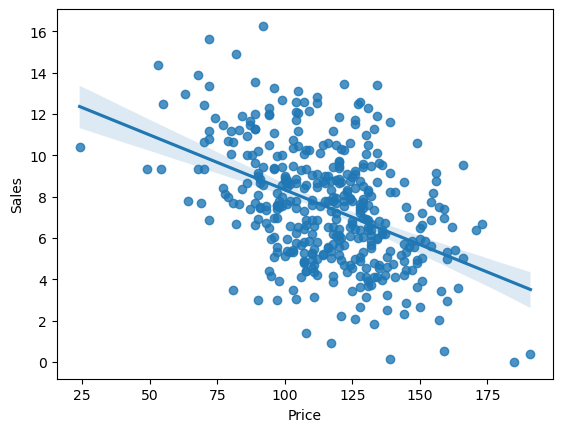

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


In [16]:
analyze('NN', 'Price', 'Sales')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

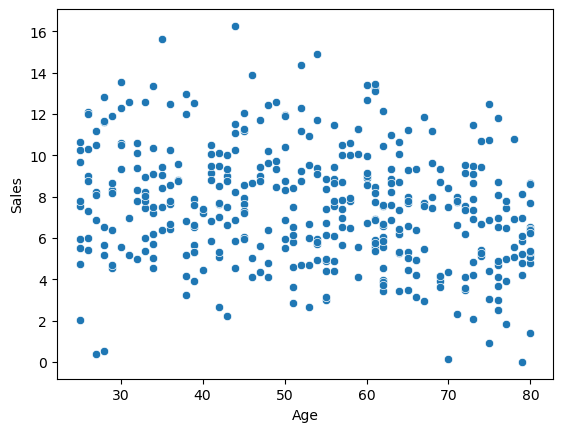

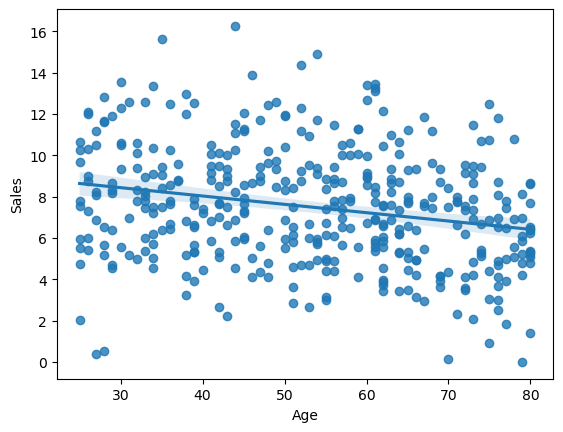

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


In [17]:
analyze('NN', 'Age', 'Sales')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

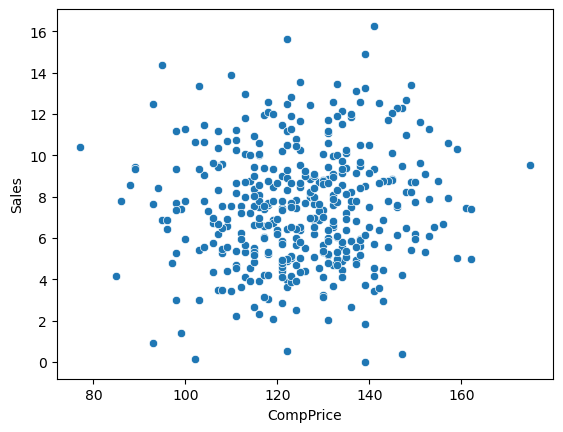

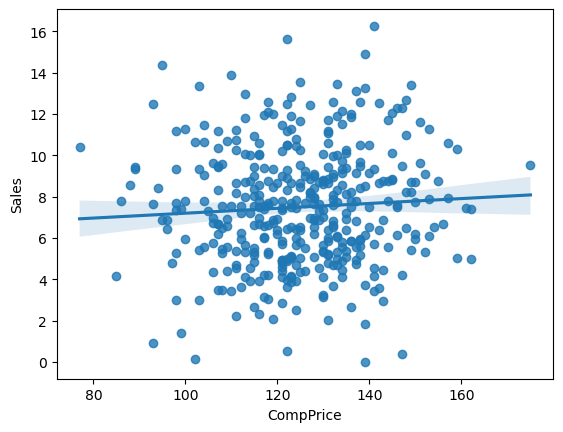

상관계수 : 0.06407872955062152, p-value : 0.20093982894184007


In [18]:
analyze('NN', 'CompPrice', 'Sales')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [16]:
data['Price_diff'] = data['CompPrice'] - data['Price']

<Axes: xlabel='Price_diff', ylabel='Sales'>

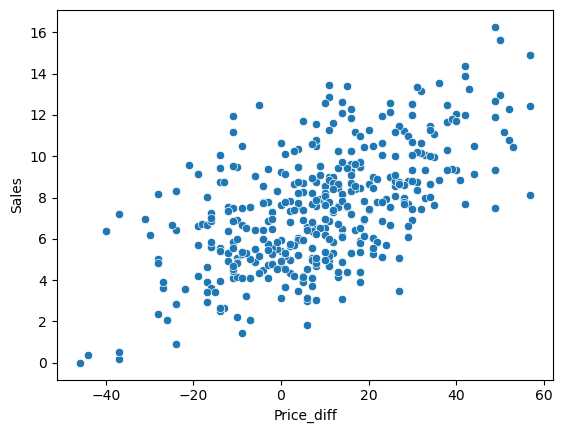

In [18]:
var = 'Price_diff'
sns.scatterplot(x=var, y=target, data=data)

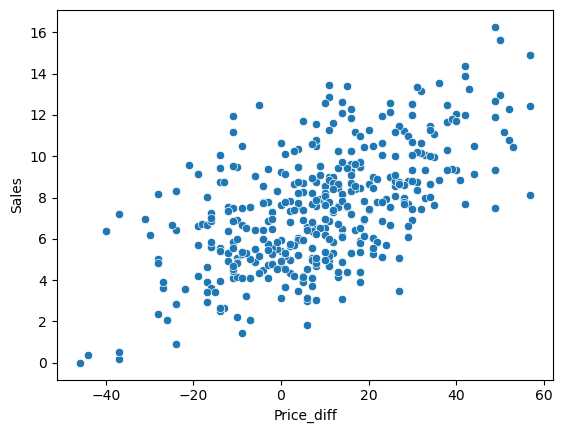

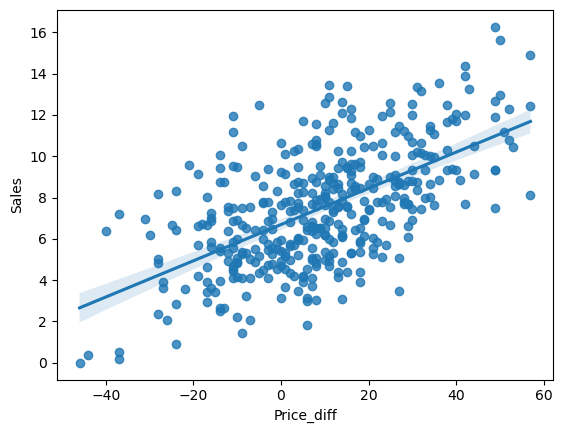

상관계수 : 0.5979217124533921, p-value : 3.877120641788767e-40


In [22]:
analyze('NN', 'Price_diff', 'Sales')

- 여러 특성 중에서, 더욱 더욱 유의미한 특성을 뽑아내기 (Feature Engineering)
- 최대한 특성을 뽑아내고, NN에게 맡기자

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

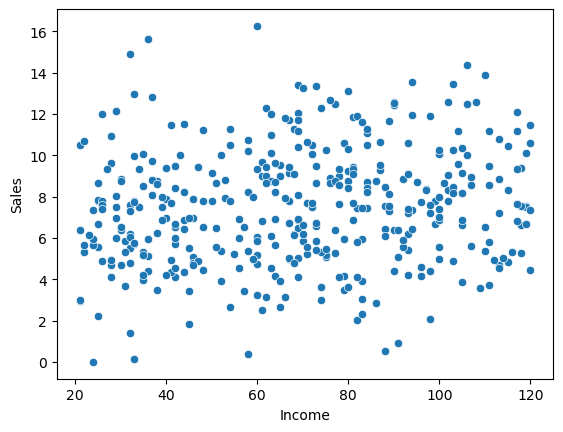

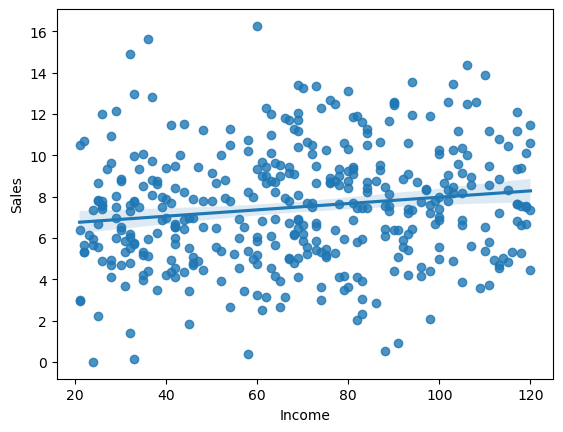

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517948


In [19]:
analyze('NN', 'Income', 'Sales')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **3.범주형 X --> Y**

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

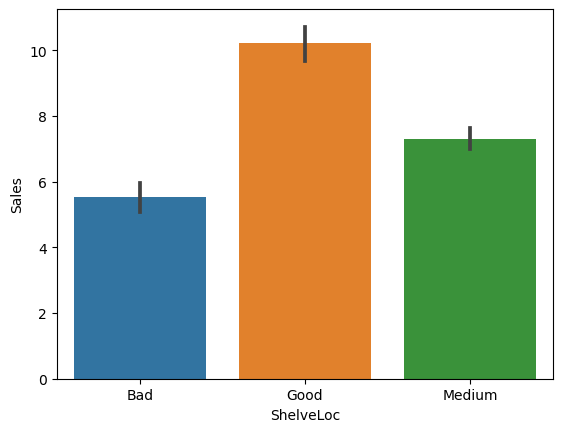

In [10]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [ ]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

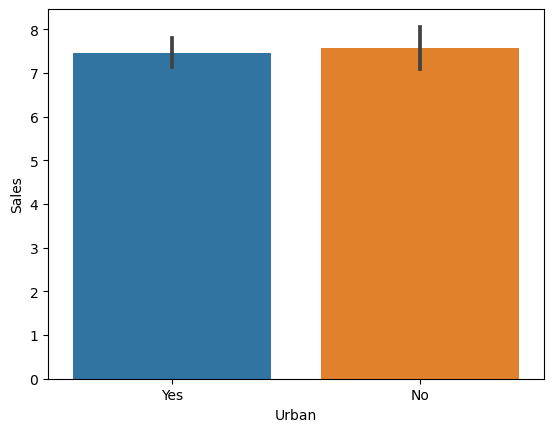

t-통계량 : -0.30765346670661126, p-value : 0.7585069603942775


In [22]:
analyze('CN', 'Urban', 'Sales')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

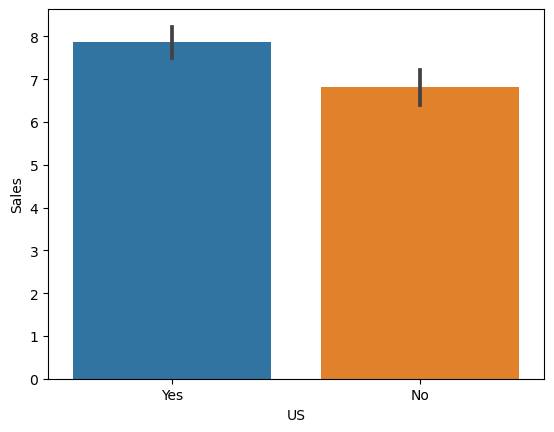

t-통계량 : 3.589738747802499, p-value : 0.00037233958701471517


In [23]:
analyze('CN', 'US', 'Sales')

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **4.관계 정리하기**

① 강한관계

shelveLoc, Price_diff

② 중간관계

③ 관계없음

Pop, Age, Income